In [4]:
!pip install pandas numpy matplotlib seaborn wordcloud Sastrawi emoji

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import emoji

file_path = "/content/dataset_teks_analisissentimen_ketahananpangan_2020-2025.csv"
df = pd.read_csv(file_path)

print(df.shape)
print(df.columns)
df.head()


(531, 15)
Index(['conversation_id_str', 'created_at', 'favorite_count', 'full_text',
       'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location',
       'quote_count', 'reply_count', 'retweet_count', 'tweet_url',
       'user_id_str', 'username'],
      dtype='object')


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1942797525150491080,Wed Jul 09 04:08:11 +0000 2025,0,Melalui kolaborasi dengan Jateng Agro Berdikar...,1942797908811866412,NaN,disporaparjtg,in,NaN,0,1,0,https://x.com/undefined/status/194279790881186...,821576106029391872,NaN
1,1942785376286040210,Wed Jul 09 03:18:24 +0000 2025,0,Melalui kolaborasi dengan Jateng Agro Berdikar...,1942785381147238570,NaN,dp3ap2kb_jateng,in,NaN,0,1,0,https://x.com/undefined/status/194278538114723...,2711873198,NaN
2,1942571594251133330,Tue Jul 08 13:08:53 +0000 2025,0,Melalui kolaborasi dengan Jateng Agro Berdikar...,1942571594251133330,https://pbs.twimg.com/ext_tw_video_thumb/19425...,NaN,in,NaN,0,1,0,https://x.com/undefined/status/194257159425113...,860418700859416576,NaN
3,1937087119241191889,Mon Jun 23 19:27:02 +0000 2025,0,@rendi89502989 @llouaeria @NarasiNewsroom Jika...,1937230940591521958,NaN,rendi89502989,in,NaN,0,1,0,https://x.com/undefined/status/193723094059152...,1720665183188922368,NaN
4,1934780208802099341,Tue Jun 17 01:17:32 +0000 2025,0,3) Pengendalian inflasi; untuk menjaga daya be...,1934782431841956276,NaN,txtangkringan,in,NaN,0,1,0,https://x.com/undefined/status/193478243184195...,1489658156989190144,NaN


In [5]:
# Hapus kolom yang kosong total
df = df.dropna(axis=1, how='all')

# Hapus duplikat berdasarkan teks
df = df.drop_duplicates(subset='full_text')

# Reset index
df = df.reset_index(drop=True)

# Cek missing values
print(df.isnull().sum())

print(f"Jumlah tweet setelah dibersihkan: {len(df)}")


conversation_id_str          0
created_at                   0
favorite_count               0
full_text                    0
id_str                       0
image_url                  388
in_reply_to_screen_name    424
lang                         0
quote_count                  0
reply_count                  0
retweet_count                0
tweet_url                    0
user_id_str                  0
dtype: int64
Jumlah tweet setelah dibersihkan: 530


In [6]:
import re
import emoji
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Buat stemmer Sastrawi
stemmer = StemmerFactory().create_stemmer()

def clean_text(text):
    # Ubah ke lowercase
    text = text.lower()
    # Hapus URL
    text = re.sub(r'http\S+|www\S+', '', text)
    # Hapus mention
    text = re.sub(r'@\w+', '', text)
    # Hapus hashtag
    text = re.sub(r'#', '', text)
    # Hapus emoji, tetap pisahkan dengan spasi
    text = emoji.replace_emoji(text, replace=lambda x, y: f' {x} ')
    # Hapus karakter non-alfabet (kecuali tanda penting)
    text = re.sub(r'[^a-zA-Z0-9\s.,!?%]', '', text)
    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df['full_text'].apply(clean_text)
df['clean_stemmed_text'] = df['clean_text'].apply(lambda x: stemmer.stem(x))
df[['full_text', 'clean_text', 'clean_stemmed_text']].head(10)



,full_text,clean_text,clean_stemmed_text
0,Melalui kolaborasi dengan Jateng Agro Berdikar...,melalui kolaborasi dengan jateng agro berdikar...,lalu kolaborasi dengan jateng agro berdikari b...
1,Melalui kolaborasi dengan Jateng Agro Berdikar...,melalui kolaborasi dengan jateng agro berdikar...,lalu kolaborasi dengan jateng agro berdikari b...
2,Melalui kolaborasi dengan Jateng Agro Berdikar...,melalui kolaborasi dengan jateng agro berdikar...,lalu kolaborasi dengan jateng agro berdikari b...
3,@rendi89502989 @llouaeria @NarasiNewsroom Jika...,jika selat hormuz ditutup hingga akhir 2025 ak...,jika selat hormuz tutup hingga akhir 2025 akib...
4,3) Pengendalian inflasi; untuk menjaga daya be...,3 pengendalian inflasi untuk menjaga daya beli...,3 kendali inflasi untuk jaga daya beli masyara...
5,Kegiatan ini dilaksanakan di halaman Kantor Ke...,kegiatan ini dilaksanakan di halaman kantor ke...,giat ini laksana di halaman kantor camat tigar...
6,Update Harga Pangan: Beras Telur Gula hingga M...,update harga pangan beras telur gula hingga mi...,update harga pangan beras telur gula hingga mi...
7,Pengecekan Stok dan Harga Minyak Goreng Minyak...,pengecekan stok dan harga minyak goreng minyak...,kece stok dan harga minyak goreng minyakita ol...
8,@kambingbalet @ARSIPAJA Klaim Mendagri bahwa h...,klaim mendagri bahwa harga pangan terkendali s...,klaim mendagri bahwa harga pangan kendali lama...
9,Daftar Harga Pangan 26 Maret 2025: Telur Cabai...,daftar harga pangan 26 maret 2025 telur cabai ...,daftar harga pangan 26 maret 2025 telur cabai ...


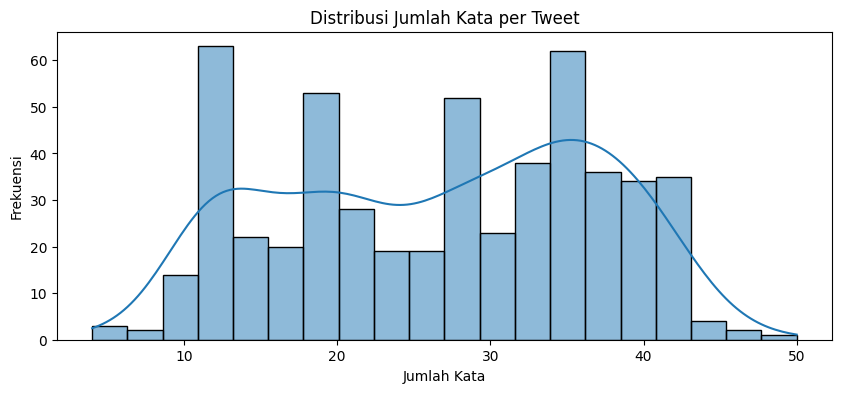

In [7]:
df['char_length'] = df['clean_text'].apply(len)
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,4))
sns.histplot(df['word_count'], bins=20, kde=True)
plt.title('Distribusi Jumlah Kata per Tweet')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.show()


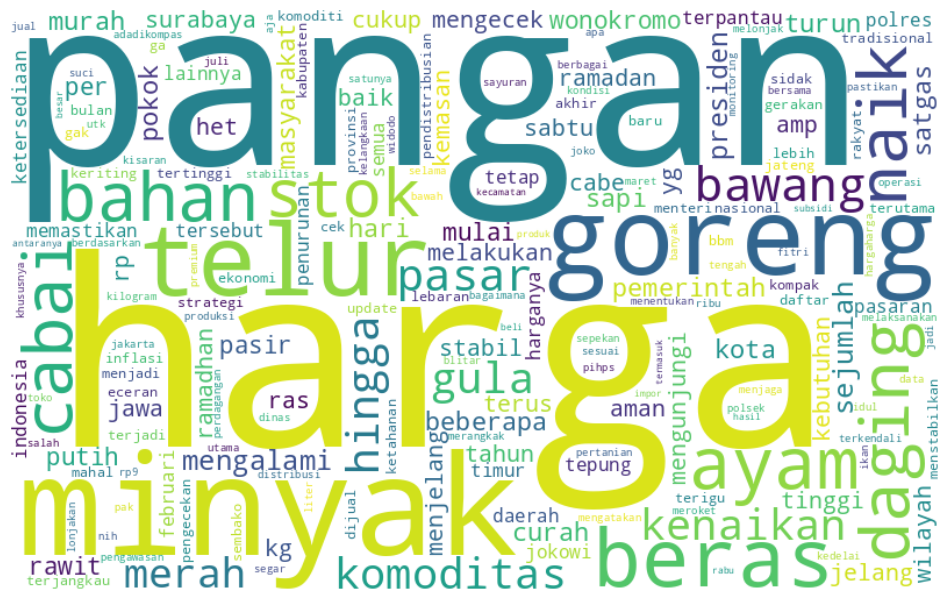

In [8]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
stop_factory = StopWordRemoverFactory()
stopwords_id = set(stop_factory.get_stop_words())

# Gabungkan semua teks untuk wordcloud
all_words = ' '.join(df['clean_text'])

# Buat WordCloud
plt.figure(figsize=(12,8))
wordcloud = WordCloud(width=800, height=500,
                      background_color='white',
                      stopwords=stopwords_id,
                      collocations=False).generate(all_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


/tmp/ipython-input-840514167.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_df, x='Frekuensi', y='Kata', palette='viridis')


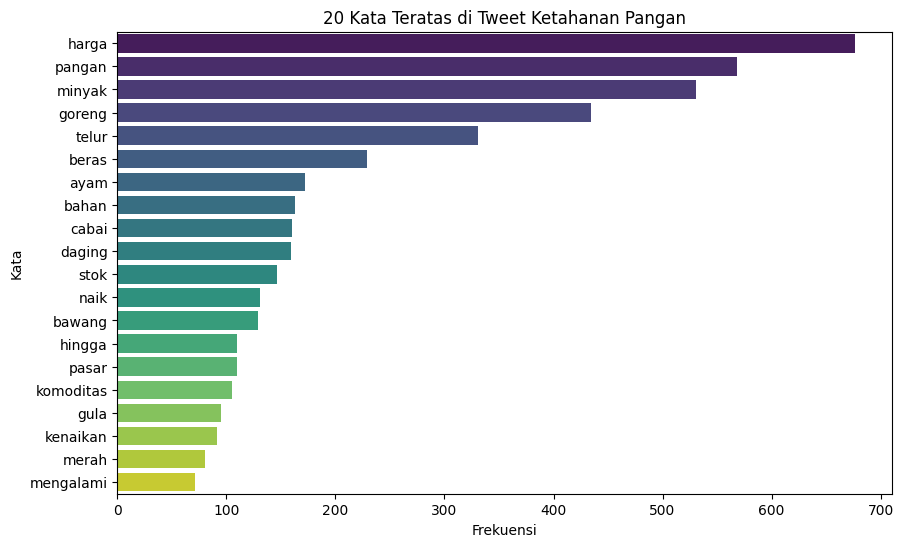

In [9]:
from collections import Counter

def get_top_n_words(corpus, n=None):
    words = [word for text in corpus for word in text.split() if word not in stopwords_id]
    counter = Counter(words)
    return counter.most_common(n)

top_words = get_top_n_words(df['clean_text'], 20)
top_df = pd.DataFrame(top_words, columns=['Kata', 'Frekuensi'])

plt.figure(figsize=(10,6))
sns.barplot(data=top_df, x='Frekuensi', y='Kata', palette='viridis')
plt.title("20 Kata Teratas di Tweet Ketahanan Pangan")
plt.show()


In [10]:
# Install dependencies di Colab
#!pip install transformers torch datasets --quiet

from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import numpy as np

# Gunakan model publik yang bisa diakses
model_name = "w11wo/indonesian-roberta-base-sentiment-classifier"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Buat pipeline untuk prediksi
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model=model,
    tokenizer=tokenizer,
    return_all_scores=True
)

# Daftar kata kunci (lowercase semua biar matching lebih mudah)
positive_keywords = [
    "turun harga", "lebih murah", "gila murah", "manfaat", "subsidi", "bantuan pangan"
]
negative_keywords = [
    "mahal", "naik harga", "langka", "krisis", "turun produksi", "inflasi"
]

def adjust_sentiment(text, preds):
    """
    Fungsi untuk menyesuaikan label sentimen berdasarkan keyword rules
    dan menambahkan confidence score yang disesuaikan.
    """
    # Normalisasi label output model
    label_map = {
        "negative": "Negatif", "Negative": "Negatif",
        "neutral": "Netral", "Neutral": "Netral",
        "positive": "Positif", "Positive": "Positif"
    }

    # Ambil prediksi tertinggi
    best_pred = max(preds, key=lambda x: x['score'])
    pred_label = label_map.get(best_pred['label'], best_pred['label'])
    confidence = best_pred['score']  # Confidence score asli dari model

    # Ubah teks ke lowercase untuk pencarian keyword
    text_lower = text.lower()
    has_positive = any(k in text_lower for k in positive_keywords)
    has_negative = any(k in text_lower for k in negative_keywords)

    # Koreksi label berdasarkan keyword (override penuh)
    if has_positive and not has_negative:
        pred_label = "Positif"
        confidence = max(confidence, 0.85)
    elif has_negative and not has_positive:
        pred_label = "Negatif"
        confidence = max(confidence, 0.85)
    elif has_positive and has_negative:
        pred_label = "Netral"
        confidence = 0.70  # campuran → confidence menengah

    return pred_label, confidence

# Contoh data
sample_texts = [
    "Harga beras turun harga minggu ini.",
    "Beras mahal sekali di pasar.",
    "Beras tersedia seperti biasa.",
    "Harga beras mahal tapi ada subsidi bantuan pangan."
]

# Uji prediksi dengan post-processing + confidence
for text in sample_texts:
    preds = sentiment_pipeline(text)[0]  # hasil = list of dict
    label_adj, conf_score = adjust_sentiment(text, preds)
    print(f"Teks: {text}")
    print(f"Label Akhir: {label_adj} (Confidence: {conf_score:.4f})")
    print("-" * 50)


Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


Teks: Harga beras turun harga minggu ini.
Label Akhir: Positif (Confidence: 0.8500)
--------------------------------------------------
Teks: Beras mahal sekali di pasar.
Label Akhir: Negatif (Confidence: 0.9989)
--------------------------------------------------
Teks: Beras tersedia seperti biasa.
Label Akhir: Negatif (Confidence: 0.8957)
--------------------------------------------------
Teks: Harga beras mahal tapi ada subsidi bantuan pangan.
Label Akhir: Netral (Confidence: 0.7000)
--------------------------------------------------


Distribusi Sentimen:
sentiment
Netral     414
Negatif     74
Positif     42
Name: count, dtype: int64

Rata-rata Confidence per Kelas:
sentiment
Negatif    0.943868
Netral     0.973545
Positif    0.863507
Name: confidence, dtype: float64


/tmp/ipython-input-1257481905.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="pastel")


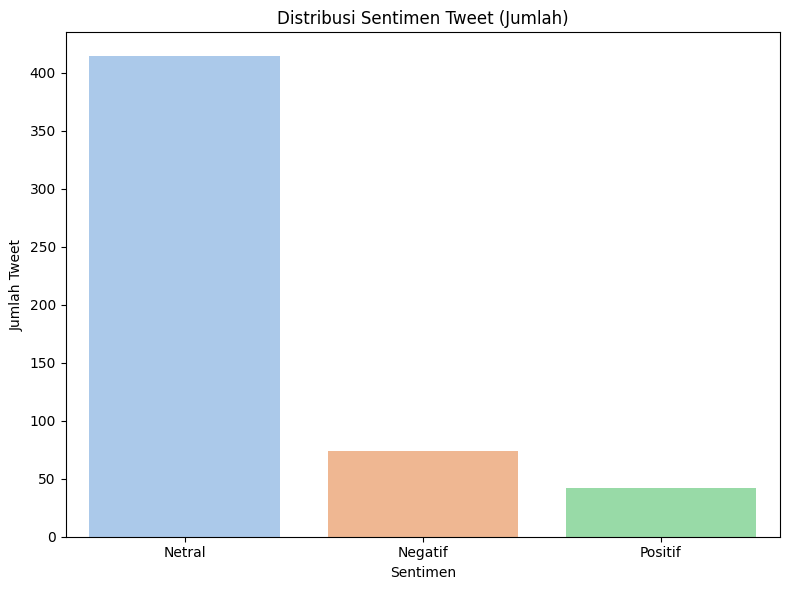

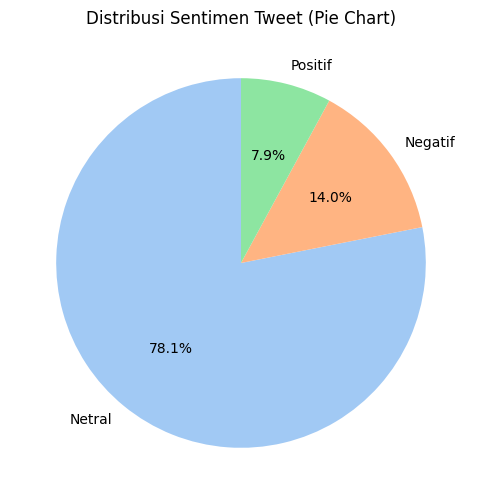

/tmp/ipython-input-1257481905.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=confidence_mean.index, y=confidence_mean.values, palette="muted")


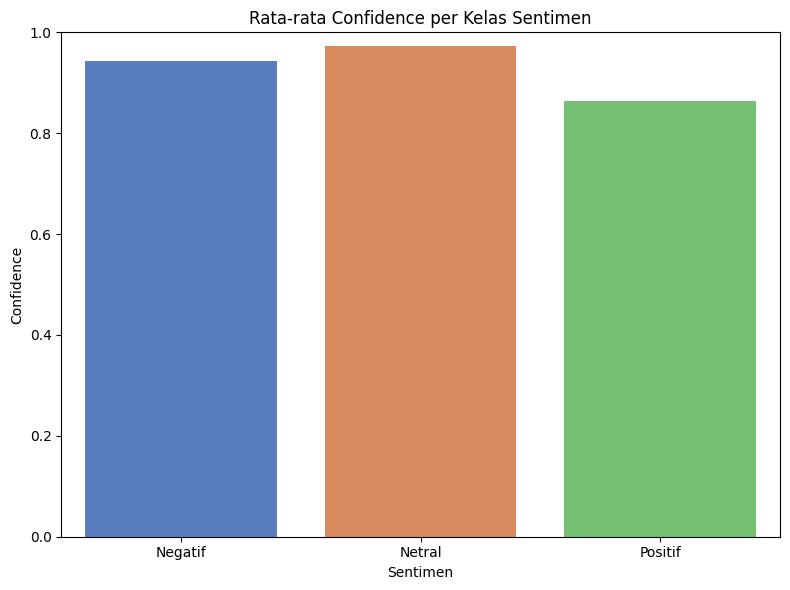

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pastikan kolom sentiment dan confidence kosong di awal
df['sentiment'] = ""
df['confidence'] = 0.0

# --- Jalankan pipeline ke seluruh teks dengan batching ---
all_preds = sentiment_pipeline(list(df['clean_text']), batch_size=16)

# --- Loop untuk setiap tweet dan adjust sentiment ---
results = [adjust_sentiment(text, preds) for text, preds in zip(df['clean_text'], all_preds)]
df['sentiment'] = [r[0] for r in results]
df['confidence'] = [r[1] for r in results]

# --- Distribusi sentimen ---
sentiment_counts = df['sentiment'].value_counts()
print("Distribusi Sentimen:")
print(sentiment_counts)

# --- Rata-rata confidence per kelas ---
confidence_mean = df.groupby('sentiment')['confidence'].mean()
print("\nRata-rata Confidence per Kelas:")
print(confidence_mean)

# --- Simpan ke Excel ---
df.to_excel("df_with_sentiment_confidence.xlsx", index=False)  # Semua tweet + label + confidence

# Simpan distribusi sentimen ke Excel
sentiment_counts_df = sentiment_counts.reset_index()
sentiment_counts_df.columns = ['Sentimen', 'Jumlah']
sentiment_counts_df.to_excel("sentiment_distribution.xlsx", index=False)

# Simpan rata-rata confidence ke Excel
confidence_mean_df = confidence_mean.reset_index()
confidence_mean_df.columns = ['Sentimen', 'Rata2_Confidence']
confidence_mean_df.to_excel("confidence_mean.xlsx", index=False)

# --- Visualisasi Bar Chart jumlah tweet ---
plt.figure(figsize=(8,6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="pastel")
plt.title("Distribusi Sentimen Tweet (Jumlah)")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Tweet")
plt.tight_layout()
plt.savefig("sentiment_distribution_bar.png")
plt.show()

# --- Visualisasi Pie Chart ---
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct="%1.1f%%",
        colors=sns.color_palette("pastel"), startangle=90)
plt.title("Distribusi Sentimen Tweet (Pie Chart)")
plt.savefig("sentiment_distribution_pie.png")
plt.show()

# --- Visualisasi Rata-rata Confidence per Kelas ---
plt.figure(figsize=(8,6))
sns.barplot(x=confidence_mean.index, y=confidence_mean.values, palette="muted")
plt.title("Rata-rata Confidence per Kelas Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Confidence")
plt.ylim(0,1)
plt.tight_layout()
plt.savefig("confidence_per_class.png")
plt.show()


📂 Excel Files: ['confidence_mean.xlsx', 'sentiment_distribution.xlsx', 'df_with_sentiment_confidence.xlsx']
📂 Image Files: ['sentiment_distribution_bar.png', 'sentiment_distribution_pie.png', 'confidence_per_class.png']

✅ confidence_mean.xlsx (5 baris pertama):


,Sentimen,Rata2_Confidence
0,Negatif,0.943868
1,Netral,0.973545
2,Positif,0.863507



✅ sentiment_distribution.xlsx (5 baris pertama):


,Sentimen,Jumlah
0,Netral,414
1,Negatif,74
2,Positif,42



✅ df_with_sentiment_confidence.xlsx (5 baris pertama):


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,quote_count,reply_count,retweet_count,tweet_url,user_id_str,clean_text,clean_stemmed_text,char_length,word_count,sentiment,confidence
0,1942797525150490880,Wed Jul 09 04:08:11 +0000 2025,0,Melalui kolaborasi dengan Jateng Agro Berdikar...,1942797908811866112,NaN,disporaparjtg,in,0,1,0,https://x.com/undefined/status/194279790881186...,821576106029391872,melalui kolaborasi dengan jateng agro berdikar...,lalu kolaborasi dengan jateng agro berdikari b...,265,33,Positif,0.997100
1,1942785376286040064,Wed Jul 09 03:18:24 +0000 2025,0,Melalui kolaborasi dengan Jateng Agro Berdikar...,1942785381147238912,NaN,dp3ap2kb_jateng,in,0,1,0,https://x.com/undefined/status/194278538114723...,2711873198,melalui kolaborasi dengan jateng agro berdikar...,lalu kolaborasi dengan jateng agro berdikari b...,190,27,Positif,0.997201
2,1942571594251132928,Tue Jul 08 13:08:53 +0000 2025,0,Melalui kolaborasi dengan Jateng Agro Berdikar...,1942571594251132928,https://pbs.twimg.com/ext_tw_video_thumb/19425...,NaN,in,0,1,0,https://x.com/undefined/status/194257159425113...,860418700859416576,melalui kolaborasi dengan jateng agro berdikar...,lalu kolaborasi dengan jateng agro berdikari b...,190,27,Positif,0.997201
3,1937087119241191936,Mon Jun 23 19:27:02 +0000 2025,0,@rendi89502989 @llouaeria @NarasiNewsroom Jika...,1937230940591522048,NaN,rendi89502989,in,0,1,0,https://x.com/undefined/status/193723094059152...,1720665183188922112,jika selat hormuz ditutup hingga akhir 2025 ak...,jika selat hormuz tutup hingga akhir 2025 akib...,276,39,Netral,0.941378
4,1934780208802098944,Tue Jun 17 01:17:32 +0000 2025,0,3) Pengendalian inflasi; untuk menjaga daya be...,1934782431841956096,NaN,txtangkringan,in,0,1,0,https://x.com/undefined/status/193478243184195...,1489658156989189888,3 pengendalian inflasi untuk menjaga daya beli...,3 kendali inflasi untuk jaga daya beli masyara...,197,27,Negatif,0.993327
5,1929893502529483008,Tue Jun 03 13:30:42 +0000 2025,0,Kegiatan ini dilaksanakan di halaman Kantor Ke...,1929893506627318016,NaN,PemKabTangerang,in,0,1,0,https://x.com/undefined/status/192989350662731...,2480614310,kegiatan ini dilaksanakan di halaman kantor ke...,giat ini laksana di halaman kantor camat tigar...,276,37,Positif,0.716536
6,1925027518374916096,Wed May 21 03:15:00 +0000 2025,1,Update Harga Pangan: Beras Telur Gula hingga M...,1925027518374916096,NaN,NaN,in,0,0,0,https://x.com/undefined/status/192502751837491...,47274731,update harga pangan beras telur gula hingga mi...,update harga pangan beras telur gula hingga mi...,71,11,Netral,0.998821
7,1922873661024805120,Thu May 15 04:36:20 +0000 2025,0,Pengecekan Stok dan Harga Minyak Goreng Minyak...,1922873661024805120,https://pbs.twimg.com/media/Gq9rZtsaAAIsPnM.jpg,NaN,in,0,0,0,https://x.com/undefined/status/192287366102480...,1439087851711303936,pengecekan stok dan harga minyak goreng minyak...,kece stok dan harga minyak goreng minyakita ol...,275,37,Netral,0.998808
8,1906647669314899968,Wed Apr 02 06:07:27 +0000 2025,0,@kambingbalet @ARSIPAJA Klaim Mendagri bahwa h...,1907313913235922944,https://pbs.twimg.com/media/Gmq59kbaMAAmRX2.jpg,kambingbalet,in,0,0,0,https://x.com/undefined/status/190731391323592...,1720665183188922112,klaim mendagri bahwa harga pangan terkendali s...,klaim mendagri bahwa harga pangan kendali lama...,269,39,Netral,0.858798
9,1904772015225185024,Wed Mar 26 05:46:52 +0000 2025,0,Daftar Harga Pangan 26 Maret 2025: Telur Cabai...,1904772015225185024,NaN,NaN,in,0,0,0,https://x.com/undefined/status/190477201522518...,848614550,daftar harga pangan 26 maret 2025 telur cabai ...,daftar harga pangan 26 maret 2025 telur cabai ...,78,13,Netral,0.998967


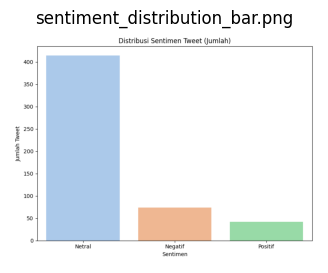

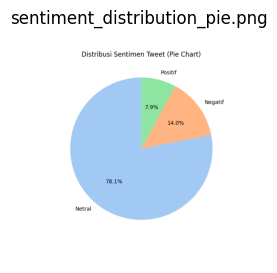

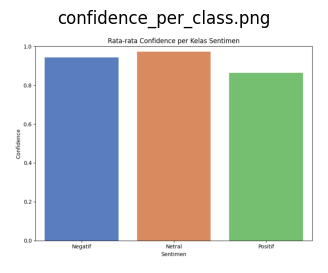

In [13]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# Path folder tempat file berada
folder_path = "/content"

# List semua file
files = os.listdir(folder_path)

# Pisahkan berdasarkan tipe file
excel_files = [f for f in files if f.endswith('.xlsx')]
image_files = [f for f in files if f.endswith('.png')]

print("📂 Excel Files:", excel_files)
print("📂 Image Files:", image_files)

# Baca semua Excel ke dictionary
excel_data = {}
for f in excel_files:
    path = os.path.join(folder_path, f)
    excel_data[f] = pd.read_excel(path)
    print(f"\n✅ {f} (5 baris pertama):")
    display(excel_data[f].head(10))

# Baca semua gambar dan tampilkan
for f in image_files:
    path = os.path.join(folder_path, f)
    img = Image.open(path)
    plt.figure(figsize=(4,3))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f)
    plt.show()


In [21]:
!git clone https://github.com/IndoNLP/indonlu.git
import pandas as pd

train = pd.read_csv("indonlu/dataset/smsa_doc-sentiment-prosa/train_preprocess.tsv", sep="\t")
valid = pd.read_csv("indonlu/dataset/smsa_doc-sentiment-prosa/valid_preprocess.tsv", sep="\t")
test  = pd.read_csv("indonlu/dataset/smsa_doc-sentiment-prosa/test_preprocess_masked_label.tsv", sep="\t")

print(train.head())


Cloning into 'indonlu'...
remote: Enumerating objects: 509, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 509 (delta 119), reused 139 (delta 110), pack-reused 316 (from 1)
Receiving objects: 100% (509/509), 9.46 MiB | 6.63 MiB/s, done.
Resolving deltas: 100% (239/239), done.
  warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !  \
0  mohon ulama lurus dan k212 mmbri hujjah partai...                                                                                                                                                                                               